This is for time-integration of ionized electron under electric field based on the Keldysh formula

In [1]:
%matplotlib inline

In [2]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
#
np.set_printoptions(precision=3)
#Mathematical constants
pi = np.pi
tpi = 2.0*pi
fpi = 4.0*pi
#Physical constants
sol = 137.0 #speed of light
aB = 0.05292 #nanometer
Hartree = 27.21 #eV
Atomtime = 0.02419 #fs
Atomfield = Hartree/aB #V/nm
Atomvolume = aB**3 #nm^3
ch = 1240.0 #eV * nm
chbar = 197.3 # eV * nm
halfepsc = 3.509e16 # W/cm^2 \frac{1}{2}*\epsilon_0 * c 
Atomfluence = halfepsc*Atomtime*1.0e-15 # J/cm^2 ,W/cm^2 * fs = femto J/cm^2

In [3]:
from Keldysh_funcs.functions import *

In [4]:
#Default value
delta = 6.50  #gap in eV
m = 0.50      #effective mass
omega = 1.55  #photon energy in eV

#Unit conversion
delta = delta/Hartree          #Convert to atomic unit
omega = omega/Hartree          #Convert to atomic unit

print ('++++++++')
print ('Material properties')
print ('Effective mass: m ='+str(m)+' [electron mass]')
print ('Band gap: delta ='+str(delta)+' [a.u.] ='+str(delta*Hartree)+' [eV]')
print ('Frequency: omega ='+str(omega)+' [a.u.] ='+str(omega*Hartree)+' [eV]')
print ('++++++++')

++++++++
Material properties
Effective mass: m =0.5 [electron mass]
Band gap: delta =0.23888276368981992 [a.u.] =6.5 [eV]
Frequency: omega =0.0569643513414186 [a.u.] =1.55 [eV]
++++++++


In [5]:
def Make_Laser_field(NT,dt,Tpulse,nenvelope,phiCEP):
    tt = np.zeros(NT,dtype='float64')
    At = np.zeros(NT,dtype='float64')
    Et = np.zeros(NT,dtype='float64')
    for it in range(NT):
        tt[it] = dt*it
        if (tt[it] < Tpulse):
            At[it] = (np.sin(pi*tt[it]/Tpulse))**nenvelope*np.sin(omega*(tt[it]-0.5*Tpulse)+phiCEP)
    At = (E/omega)*At
    for it in range(2,NT-1):
        Et[it] = (At[it+1] - At[it-1])
    Et[0] = 2*Et[1] - Et[2] 
    Et[NT-1] = 2*Et[NT-2] - Et[NT-3]
    Et = Et/(2.0*dt)
    return tt,At,Et

In [6]:
def Et2dntnt(tt,Et):
    NT = len(Et)
    dt = tt[1] - tt[0]
    epsE = 1.0e-8 #Small number to avoid numerical error
    dnt = np.zeros(NT,dtype='float64')
    nt = np.zeros(NT,dtype='float64')
    for it in range(1,NT):
        dnt[it] = get_W(m,delta,omega,Et[it]+epsE)
        nt[it] = nt[it-1] + (dnt[it-1] + dnt[it])*0.5*dt
        if (it%500 == 0):
            print('Iteration :'+str(it))
    nt[NT-1] = nt[NT-2]
    return dnt,nt

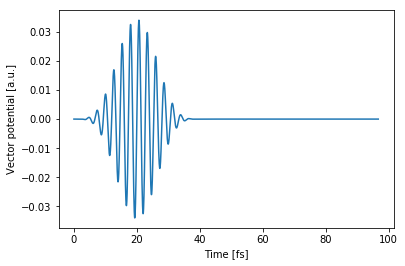

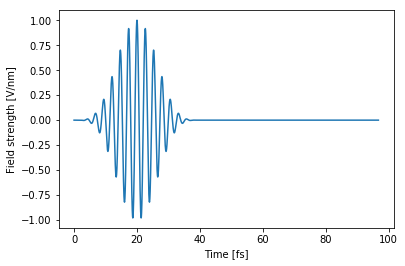

In [7]:
# Laser field
NT = 4000
dt = 1.0
Tpulse = 40.0 # Pulse duration parameter in fs
nenvelope = 4
phiCEP = 0.0*tpi
E = 1.0 # Field strength in V/nm

#Unit conversion
Tpulse = Tpulse/Atomtime
E = E/Atomfield
tt,At,Et = Make_Laser_field(NT,dt,Tpulse,nenvelope,phiCEP)

#plot
plt.figure()
plt.xlabel('Time [fs]')
plt.ylabel('Vector potential [a.u.]')
plt.plot(tt*Atomtime,At)
plt.show()
plt.figure()
plt.xlabel('Time [fs]')
plt.ylabel('Field strength [V/nm]')
plt.plot(tt*Atomtime,Et*Atomfield)
plt.show()

Iteration :500
Iteration :1000
Iteration :1500
Iteration :2000
Iteration :2500
Iteration :3000
Iteration :3500


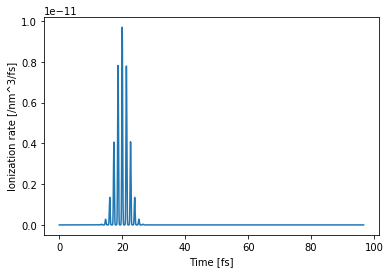

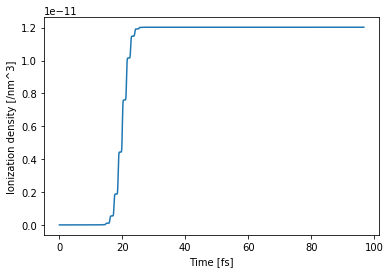

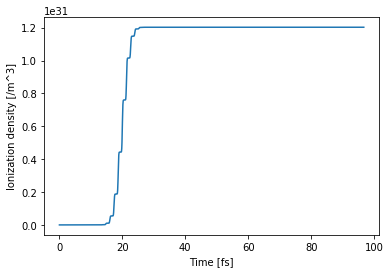

In [8]:
# Get the ionization rate and ionization density
dnt, nt = Et2dntnt(tt,Et)

# Plot
plt.figure()
plt.xlabel('Time [fs]')
plt.ylabel('Ionization rate [/nm^3/fs]')
plt.plot(tt*Atomtime,dnt/Atomvolume/Atomtime)
plt.show()
plt.figure()
plt.xlabel('Time [fs]')
plt.ylabel('Ionization density [/nm^3]')
plt.plot(tt*Atomtime,nt/Atomvolume)
plt.show()
plt.figure()
plt.xlabel('Time [fs]')
plt.ylabel('Ionization density [/m^3]')
plt.plot(tt*Atomtime,nt/Atomvolume*1.0e42)
plt.show()